In [1]:
# https://www.youtube.com/watch?v=J1jhfAw5Uvo

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [2]:
X_train = np.loadtxt('F:\Data\input.csv', delimiter = ',')
# Data imort  form local computer  

In [3]:
Y_train = np.loadtxt('F:\Data\labels.csv', delimiter = ',')   
X_test = np.loadtxt('F:\Data\input_test.csv', delimiter = ',')
Y_test = np.loadtxt('F:\Data\labels_test.csv', delimiter = ',')

In [4]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


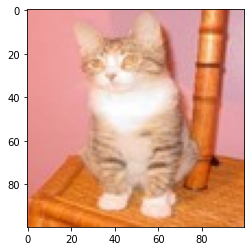

In [17]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx])
plt.show()

In [7]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [8]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [9]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 20s 336ms/step - loss: 0.7220 - accuracy: 0.5210
Epoch 2/5
32/32 [==============================] - 11s 335ms/step - loss: 0.6701 - accuracy: 0.5975
Epoch 3/5
32/32 [==============================] - 11s 337ms/step - loss: 0.6095 - accuracy: 0.6680
Epoch 4/5
32/32 [==============================] - 11s 333ms/step - loss: 0.5404 - accuracy: 0.7340
Epoch 5/5
32/32 [==============================] - 11s 338ms/step - loss: 0.4994 - accuracy: 0.7590


In [15]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 36ms/step - loss: 0.6059 - accuracy: 0.6900


[0.6059412360191345, 0.6899999976158142]

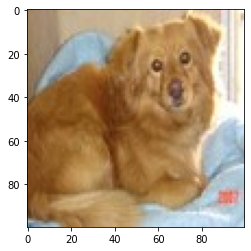

1/1 [==============================] - 0s 39ms/step
Our model says it is a : dog


In [21]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)